In [1]:
import numpy as np
from shapely.ops import linemerge, cascaded_union
from shapely.geometry import MultiPolygon, MultiLineString

def filter_feature(cfeature, extent):
    return list(cfeature.intersecting_geometries(extent))


def geometry2array(geoms):
    """
    Expect a homogenous list with either MultiPolygon or MultiLineString,
    and extract the longest (first) LineString ignoring island.

    """
    if isinstance(geoms[0], MultiPolygon):
        geom = cascaded_union(geoms).boundary
        # Not sure if this causes an artifacts, but it is needed to join lines close together.
        line = linemerge(geom)[0]
    elif isinstance(geoms[0], MultiLineString):
        line = linemerge(geoms[0])
    else:
        msg = 'Expected a list of `MultiPolygon` or `MultiLineString` but got {}'.format
    return np.array(line.coords)


def knn_search(x, D, K):
    """Find `K` nearest `x` neighbours on `D`."""
    m, n = D.shape
    x = np.atleast_2d(x)
    K = K if K < n else n
    # Euclidean distances from the other points.
    sqd = np.sqrt(((D - x[:n, :])**2).sum(axis=1))
    idx = np.argsort(sqd)
    return idx[K]


def extract_coastline(p0, p1, data):
    idx0 = knn_search(p0, data, 1)
    idx1 = knn_search(p1, data, 1)
    return idx0, idx1

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [-39, -38.25, -13.25, -12.5]

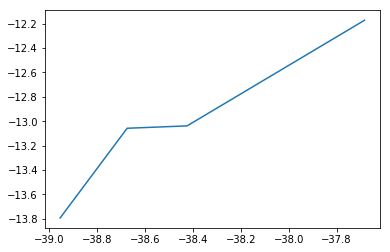

In [3]:
coastline = cfeature.COASTLINE

geoms = filter_feature(coastline, extent=extent)
data = geometry2array(geoms)

p0 = extent[0], extent[2]
p1 = extent[1], extent[3]

idx0, idx1 = extract_coastline(p0, p1, data)
lines, = plt.plot(data[idx1:idx0+1, 0], data[idx1:idx0+1, 1])

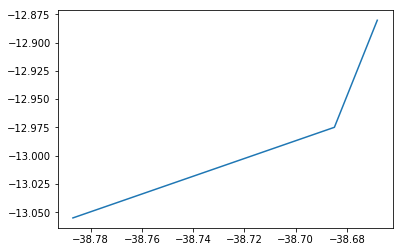

In [4]:
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')

geoms = filter_feature(coastline, extent=extent)
data = geometry2array(geoms)

p0 = extent[0], extent[2]
p1 = extent[1], extent[3]

idx0, idx1 = extract_coastline(p0, p1, data)
lines, = plt.plot(data[idx1:idx0+1, 0], data[idx1:idx0+1, 1])

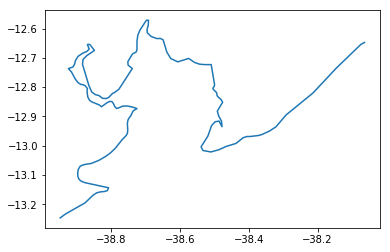

In [5]:
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m')

geoms = filter_feature(coastline, extent=extent)
data = geometry2array(geoms)

p0 = extent[0], extent[2]
p1 = extent[1], extent[3]

idx0, idx1 = extract_coastline(p0, p1, data)
lines, = plt.plot(data[idx1:idx0+1, 0], data[idx1:idx0+1, 1])

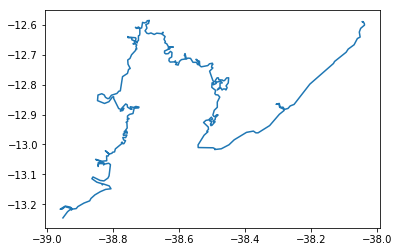

In [6]:
coastline = cfeature.GSHHSFeature(scale='high')

geoms = filter_feature(coastline, extent=extent)
data = geometry2array(geoms)

p0 = extent[0], extent[2]
p1 = extent[1], extent[3]

idx0, idx1 = extract_coastline(p0, p1, data)
lines, = plt.plot(data[idx1:idx0+1, 0], data[idx1:idx0+1, 1])